<a href="https://colab.research.google.com/github/Vamsikrishna1804/INFO-5502/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Titanic Dataset Data analysis and Machine learning Model**

 The Titanic dataset has been downloaded from this website -https://www.kaggle.com/c/titanic/
 We are analyzing the question which is given in the kaggle site - Can we use the dataset to predict if the person has survived the titanic disaster. Also what is the best predictors of survival and what is the best model fitting the survival prediction


Out of the box we are presented with  datasets - train.csv (training set) , test.csv(test set).
We will use the necesssary libraries like pandas, seaborn and matplotlib to explore the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
print(len(train))
print(len(test))

891
418


Our training data set has 891 rows where as test set has 418 rows

In [ ]:
print(len(train.columns))
print(len(test.columns))

12
11


As expected we have 12 columns in training set and 11 columns in test since we have to predict whether the person has survived or not in the test set

In [ ]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


The data definintion for each column are as follows
| Variable    | Definition  | Key         |
| ----------- | ----------- |-------------|
| PassengerId      | Unique Passenger ID       |           |
| Survived      | Survival       | 0 = No, 1 = Yes            |
| pclass   | Ticket class       | 1 = 1st, 2 = 2nd, 3 = 3rd            |
| sex   | Sex        |             |
| Age   |  	Age in years        |             |
| sibsp   | # of siblings / spouses aboard the Titanic        |             |
| parch   | # of parents / children aboard the Titanic        |             |
| ticket   | Ticket number        |             |
| fare   | Passenger fare        |             |
| cabin   |  	Cabin number       |             |
| embarked   | Port of Embarkation        |    C = Cherbourg, Q = Queenstown, S = Southampton         |



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Running the info function lets us know that there are null values in the Age and Cabin . We can remove the nulls either by ignoring the column entierly or we can remove the rows with missing values or impute the values . We will be imputing the missing values for Age and we will be ignoring the column cabin for the ML models since there arent enough observations. We will use the interpolation with nearest method to fill the missing values for age column. Python will auto fill the values with closest resembling row . We will still use the cabin column for the other EDA


In [ ]:
train['Age']=train['Age'].interpolate('nearest')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Running the basic statistics for the dataframe

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.618316,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.590202,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The describe function provides good amount of statistical information on most of the numerical columns except the survival column. The survival column in the dataset is ideally a boolean flag so the statistical values are meaningless . Let us instead see how many people survived vs how many were unlucky

Number of people who did not survived are 549 and who survived are 342


Text(0.5, 1.0, 'Number of people survive vs Number of people who didnt')

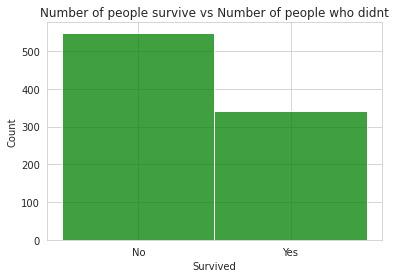

In [ ]:
print('Number of people who did not survived are {0} and who survived are {1}'.format(train.groupby(['Survived'])['PassengerId'].count()[0],train.groupby(['Survived'])['PassengerId'].count()[1]))
sns.set_style('whitegrid')
remap={0:'No',1:'Yes'}
sns.histplot(train['Survived'].map(remap),color='green')
plt.title('Number of people survive vs Number of people who didnt')

We can check how each predictor has affected the survival rate . We are excluding passengerId column as it is only a unique identifier and doesnt provide any statistical advantage

## Age vs Survival

We will look at Age primarily as an indicator to see if really young children were given higher preference when rescuing from the titanic . First lets see a histplot of age and how many people survived vs not. We are binning age range into arbitary 10 bins . The bin ranges are as follows



In [ ]:
pd.cut(train['Age'],10,retbins=True)

(0      (16.336, 24.294]
 1       (32.252, 40.21]
 2      (24.294, 32.252]
 3       (32.252, 40.21]
 4       (32.252, 40.21]
              ...       
 886    (24.294, 32.252]
 887    (16.336, 24.294]
 888    (16.336, 24.294]
 889    (24.294, 32.252]
 890    (24.294, 32.252]
 Name: Age, Length: 891, dtype: category
 Categories (10, interval[float64]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] <
                                      (24.294, 32.252] ... (48.168, 56.126] < (56.126, 64.084] <
                                      (64.084, 72.042] < (72.042, 80.0]],
 array([ 0.34042,  8.378  , 16.336  , 24.294  , 32.252  , 40.21   ,
        48.168  , 56.126  , 64.084  , 72.042  , 80.     ]))

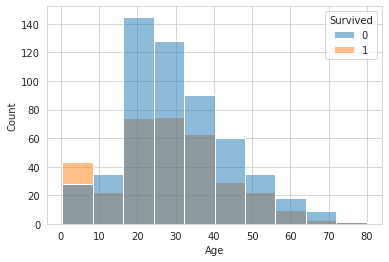

In [ ]:
sns.histplot(train, x='Age', bins=10, hue='Survived')

From the above graph we can make the following observations
<ol><li>Most of the people were in the age range 16-24 followed by 24-32</li>
<li>We can see that in age range (0-8) we see more survivors</li>
<li>As we go up the age range the number of survivors to number of people who didnt is reducing</li>

So the people tried to ensure the young people get rescued 

## Gender vs Survived

We will also look at the other important factor whether if gender played a role in the survived . There was always claim that the Females were prioritized in rescuing during the titanic event . We will check if the claim is accurate

In [ ]:
train.groupby(['Sex','Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

Text(0.5, 1.0, 'Sex Vs Survival')

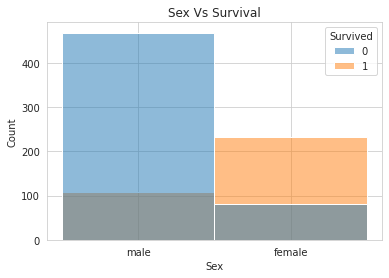

In [ ]:
sns.histplot(train, x='Sex',hue='Survived')
plt.title('Sex Vs Survival')

We can clearly observe that the the survival rate of females is much higher than that of the survival rate of males . Infact more males didnt survive 

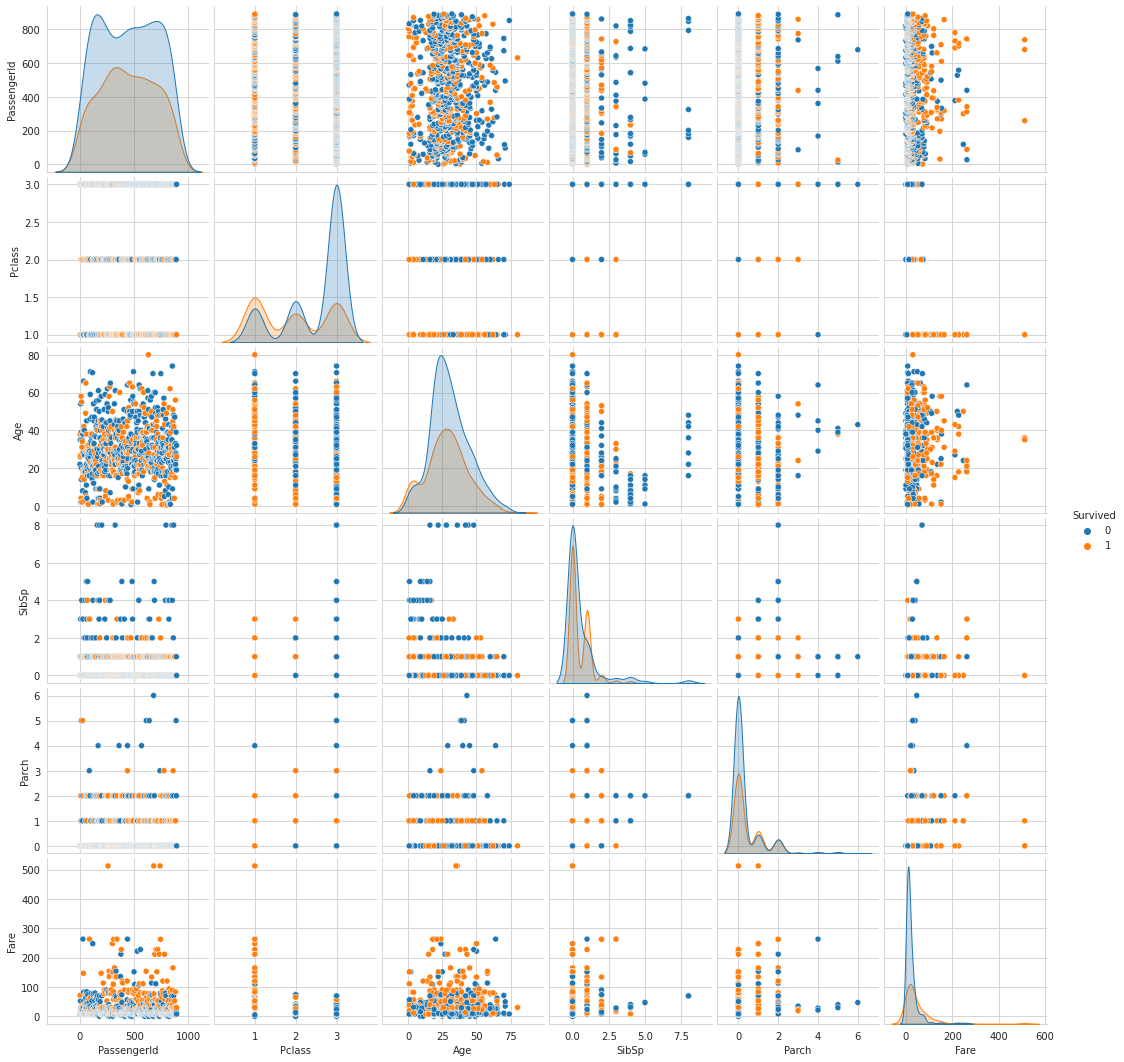

In [ ]:
sns.pairplot(train, hue='Survived')

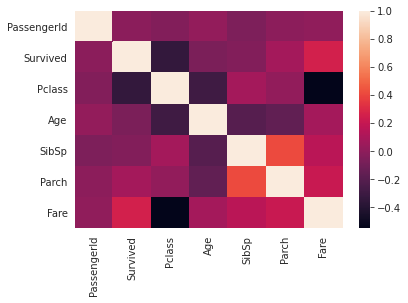

In [ ]:
train_corr=train.corr()
sns.heatmap(train_corr)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train2=train.drop(['Cabin'],axis=1)
train2=train2.dropna(axis=0)
X=train2.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
remap={'male':0,'female':1}
remap2={'S':0,'C':1,'Q':2}
X['Sex']=X['Sex'].map(remap)
X['Embarked']=X['Embarked'].map(remap2)
Y=train2['Survived']

In [ ]:
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [ ]:
Y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
X_train, X_test, Y_train,Y_test= train_test_split(X, Y, test_size=0.25)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))


666
223
666
223


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)
ypred=model_LR.predict(X_test)
accuracy_score(ypred,Y_test)

0.8116591928251121

In [ ]:
model_KNN=KNeighborsClassifier()
model_KNN.fit(X_train,Y_train)
ypred=model_KNN.predict(X_test)
accuracy_score(ypred,Y_test)

0.6816143497757847

In [ ]:
kvals=[*range(1,51)]
avg_acc_score=[]
for i in kvals:
    model_KNN=KNeighborsClassifier(i)
    avg_acc_score.append(np.array(cross_val_score(model_KNN,X_train,Y_train,scoring='accuracy',cv=10)).mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'K values vs Accuracy Score')

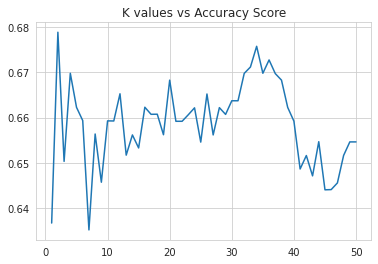

In [ ]:
sns.lineplot(kvals,avg_acc_score)
plt.title('K values vs Accuracy Score')

We can see that logistic regression is the better performing model with accuracy close to 81%